In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Why Anomaly detection?

Data driven maintenance strategy optimization is critical in a rapidly changing, competitive world. it is very critical to reduce the costs, minimize the risk, and improve performance for the competitive edge in today's rapidly changing operational environment. The objective of this study is to be able to detect anomalies in order to plan a better maintenance strategy. I will be utilizing the Pycaret Anomaly detection library and compare the famous algorithm performance. Initially I had started with Pycaret classification application(refer to https://www.kaggle.com/code/dorotheantsosheng/pycaret-classification-application-on-pump-sensor/notebook) but later realised that that although i had achieved the highest accuracy, the main objective was not achieved due to the imbalance of the dataset. Let's explore this method and compare the results. 

# 🛠 Import Modules and Libraries

By the time I produced the workbook it seems the best Pycaret installation method on Kaggle notebook is as below.

reference: https://www.kaggle.com/questions-and-answers/144277
A very helpful source to get started:
* https://pycaret.gitbook.io/docs/

#  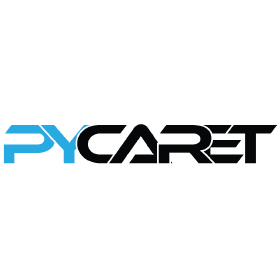


In [2]:
# # Install PyCaret
# !pip install --pre pycaret
# print("Pycaret installation complete")

In [3]:
#Import of data exploratio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# visualisations
from plotly.subplots import make_subplots
#import plotly.graph_objects as go


# 🛠 **Read the data**


Let's have a look at this dataset.

About the dataset
The dataset is of a water pump in a small area far from a big town; there were seven system failures last year. Those failures cause a huge problem. It could be due to the NDA to protect the company, which could be the reason for not releasing sensor and pump details. Refer to the link for more information:https://www.kaggle.com/datasets/nphantawee/pump-sensor-data/discussion

In [4]:
df= pd.read_csv('sensor.csv',engine='python', sep = ',', decimal = '.')
df['timestamp'] =  pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S' ,utc='True')
df.head()


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00+00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00+00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00+00:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00+00:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00+00:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


🔎Findings:
* 🚩We have an unnamed column which will require to be removed.
* 🚩We have about 52 seonsors.
* 🚩The machine status will be required to be encoded as Machine learning models work better with numbers


# **📈 EDA ( Exploratory data Analysis)**

> 🔎Finding: 

* We have a more precise observation of where most values lie. Let us locate the failure events. BARTLOMIEJ GREN inspired the Failure investigation on https://www.kaggle.com/code/garteb/eda-of-sensors-data-phase-1 . Let's explore that more..

In [5]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Unnamed: 0      220320 non-null  int64              
 1   timestamp       220320 non-null  datetime64[ns, UTC]
 2   sensor_00       210112 non-null  float64            
 3   sensor_01       219951 non-null  float64            
 4   sensor_02       220301 non-null  float64            
 5   sensor_03       220301 non-null  float64            
 6   sensor_04       220301 non-null  float64            
 7   sensor_05       220301 non-null  float64            
 8   sensor_06       215522 non-null  float64            
 9   sensor_07       214869 non-null  float64            
 10  sensor_08       215213 non-null  float64            
 11  sensor_09       215725 non-null  float64            
 12  sensor_10       220301 non-null  float64            
 13  sensor_11     

> 🔎Findings:

* Sensor_15 has no values, thus shall be dropped along with the unnamed column.

In [6]:
df.drop(columns=['sensor_15','Unnamed: 0'], inplace=True)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00+00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00+00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00+00:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00+00:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00+00:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00+00:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00+00:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00+00:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00+00:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


> 🔎Findings:

* Exploring where most of the data lie( boxplot and swarm plots) is a good option, but with so many features, it might take a while.

In [7]:
# features extractor for columns
def get_column_features(df):
    
    df_features = pd.DataFrame()
    col_list = ['Sensor','Max','Min','q_0.25','q_0.50','q_0.75']
    
    for column in df:
        tmp_q = df[column].quantile([0.25,0.5,0.75])
        tmp1 = pd.Series([column,max(df[column]),min(df[column]),tmp_q[0.25],tmp_q[0.5],tmp_q[0.75]],name='d')
        tmp1.index = col_list
        df_features = df_features.append(tmp1)
        
    return df_features

# get list os signal columns without timestamp and status:
signal_columns = [c for c in df.columns if c not in ['timestamp', 'machine_status']]
get_column_features(df[signal_columns])

C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\4168794641.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(tmp1)
C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\4168794641.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(tmp1)
C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\4168794641.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(tmp1)
C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\4168794641.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(tmp1)
C:\Users\Minh Chau\A

,Sensor,Max,Min,q_0.25,q_0.50,q_0.75
d,sensor_00,2.549016,0.000000,2.438831,2.456539,2.499826
d,sensor_01,56.727430,0.000000,46.310760,48.133678,49.479160
d,sensor_02,56.032990,33.159720,50.390620,51.649300,52.777770
d,sensor_03,48.220490,31.640620,42.838539,44.227428,45.312500
d,sensor_04,800.000000,2.798032,626.620400,632.638916,637.615723
d,sensor_05,99.999880,0.000000,69.976260,75.576790,80.912150
d,sensor_06,22.251160,0.014468,13.346350,13.642940,14.539930
d,sensor_07,23.596640,0.000000,15.907120,16.167530,16.427950
d,sensor_08,24.348960,0.028935,15.183740,15.494790,15.697340
d,sensor_09,25.000000,0.000000,15.053530,15.082470,15.118630


In [8]:
#check nan values
missing_count= df.isnull().sum() # count the number of missing values
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # the percentage of the missing values
missing_df= pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
print(missing_df)

                count  percentage
timestamp           0         0.0
sensor_00       10208         4.6
sensor_01         369         0.2
sensor_02          19         0.0
sensor_03          19         0.0
sensor_04          19         0.0
sensor_05          19         0.0
sensor_06        4798         2.2
sensor_07        5451         2.5
sensor_08        5107         2.3
sensor_09        4595         2.1
sensor_10          19         0.0
sensor_11          19         0.0
sensor_12          19         0.0
sensor_13          19         0.0
sensor_14          21         0.0
sensor_16          31         0.0
sensor_17          46         0.0
sensor_18          46         0.0
sensor_19          16         0.0
sensor_20          16         0.0
sensor_21          16         0.0
sensor_22          41         0.0
sensor_23          16         0.0
sensor_24          16         0.0
sensor_25          36         0.0
sensor_26          20         0.0
sensor_27          16         0.0
sensor_28     

📍 *Let's locate  the operating events( Broken,recovering and normal)*

In [9]:
#locate indices of failure events and recovering and normal state
normal_idx = df.loc[df['machine_status'] == 'NORMAL'].index
failure_idx = df.loc[df['machine_status'] == 'BROKEN'].index
recovering_idx = df.loc[df['machine_status'] == 'RECOVERING'].index

bef_failure_idx = list()
for j in failure_idx:
    for i in range(24*60):
        bef_failure_idx.append(j-i)
        
bef_failure_idx.sort()

#locate timestamps of failures:
failures_timestamps = df.loc[failure_idx,'timestamp']
print(failures_timestamps)

17155    2018-04-12 21:55:00+00:00
24510    2018-04-18 00:30:00+00:00
69318    2018-05-19 03:18:00+00:00
77790    2018-05-25 00:30:00+00:00
128040   2018-06-28 22:00:00+00:00
141131   2018-07-08 00:11:00+00:00
166440   2018-07-25 14:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


> 🔎Findings:

* The failure events occurred in April(x2),May(x2),June(x2) and July 2018.

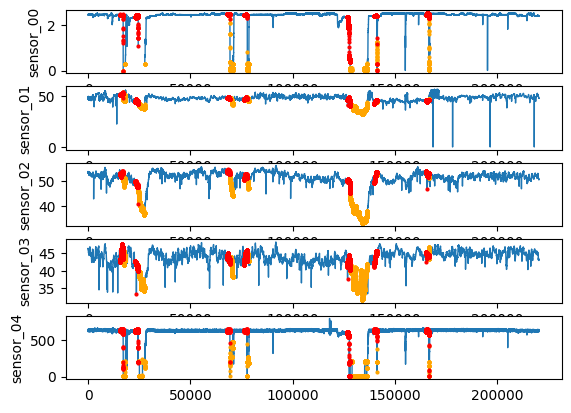

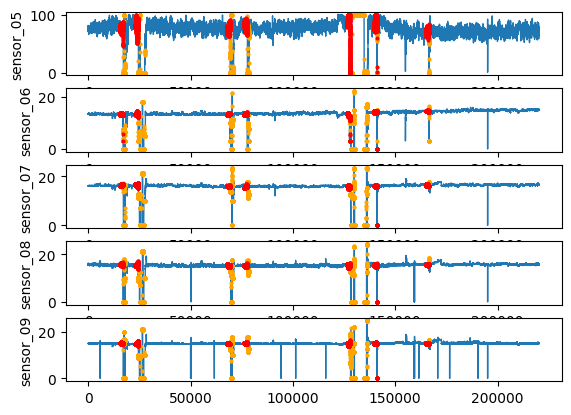

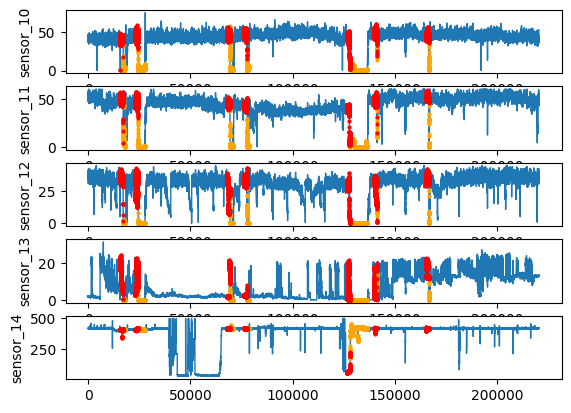

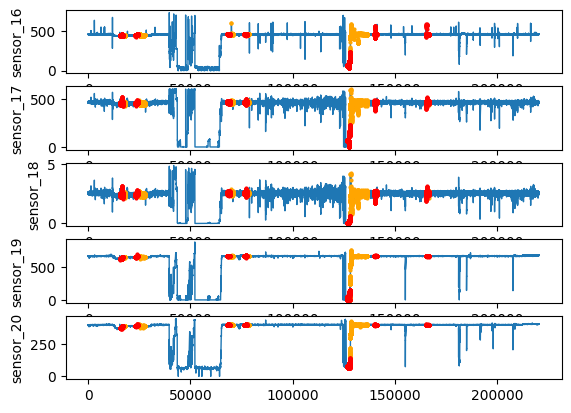

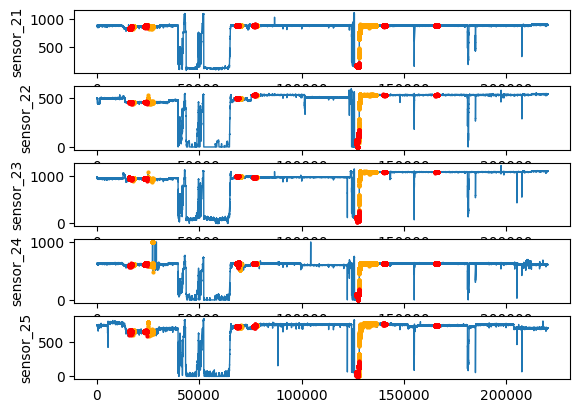

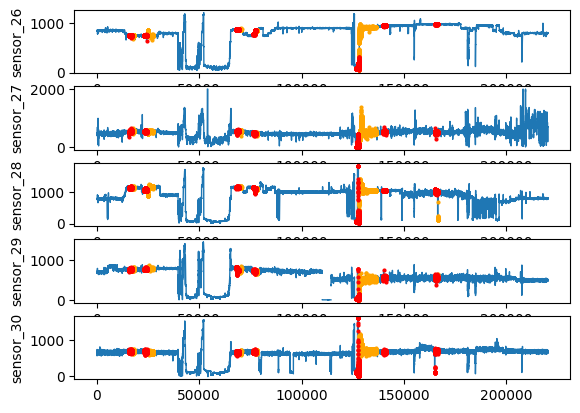

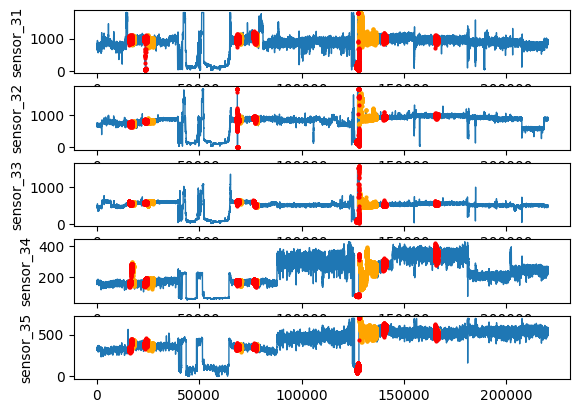

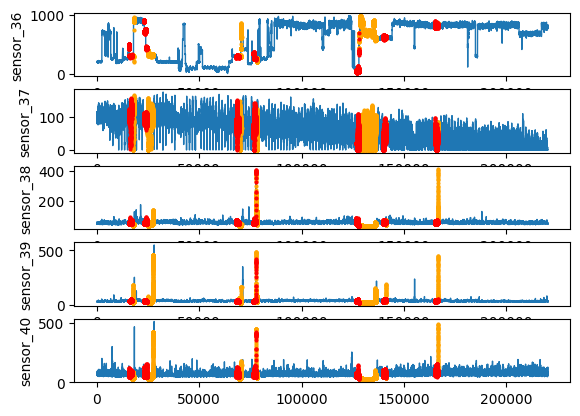

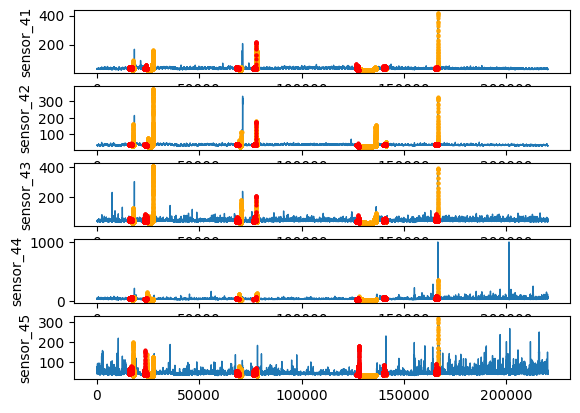

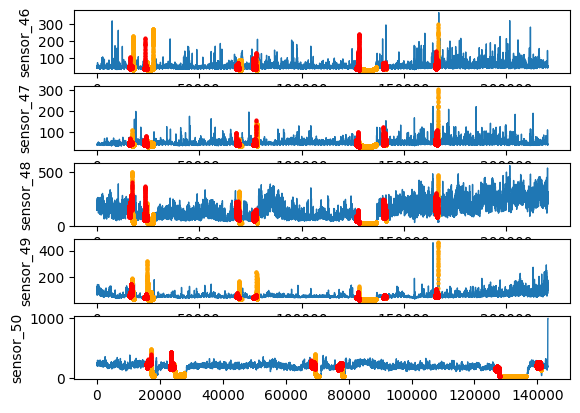

In [10]:
for i in range(10):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)
    
    ax1.set_ylabel(signal_columns[i*5])
    ax1.plot(df[signal_columns[i*5]],linewidth=1)
    ax1.plot(df.loc[list(recovering_idx),signal_columns[i*5]],linestyle='none',marker='.',color='orange',markersize=4)
    ax1.plot(df.loc[bef_failure_idx,signal_columns[i*5]],linestyle='none',marker='.',color='red',markersize=4)
        
    ax2.set_ylabel(signal_columns[i*5+1])
    ax2.plot(df[signal_columns[i*5+1]],linewidth=1)
    ax2.plot(df.loc[list(recovering_idx),signal_columns[i*5+1]],linestyle='none',marker='.',color='orange',markersize=4)
    ax2.plot(df.loc[bef_failure_idx,signal_columns[i*5+1]],linestyle='none',marker='.',color='red',markersize=4)
    
    ax3.set_ylabel(signal_columns[i*5+2])
    ax3.plot(df[signal_columns[i*5+2]],linewidth=1)
    ax3.plot(df.loc[list(recovering_idx),signal_columns[i*5+2]],linestyle='none',marker='.',color='orange',markersize=4)
    ax3.plot(df.loc[bef_failure_idx,signal_columns[i*5+2]],linestyle='none',marker='.',color='red',markersize=4)
    
    ax4.set_ylabel(signal_columns[i*5+3])
    ax4.plot(df[signal_columns[i*5+3]],linewidth=1)
    ax4.plot(df.loc[list(recovering_idx),signal_columns[i*5+3]],linestyle='none',marker='.',color='orange',markersize=4)
    ax4.plot(df.loc[bef_failure_idx,signal_columns[i*5+3]],linestyle='none',marker='.',color='red',markersize=4)
    
    ax5.set_ylabel(signal_columns[i*5+4])
    ax5.plot(df[signal_columns[i*5+4]],linewidth=1)
    ax5.plot(df.loc[list(recovering_idx),signal_columns[i*5+4]],linestyle='none',marker='.',color='orange',markersize=4)
    ax5.plot(df.loc[bef_failure_idx,signal_columns[i*5+4]],linestyle='none',marker='.',color='red',markersize=4)
    plt.show()

> 🔎Findings:

* 🚩Sensor 50 has over a third of the dataset with NAN values, whilst sensor 51 has a 7% dataset with null values. I will drop the sensors in the final analysis. You will notice sensor_50 the data does not match with the rest more like it has shifted ahead of time.

* 🚩Sensor_37 is deteriorating over time and is not cooperating as the other signals. Let's observe it once more with the correlation matrix. The sensor could have been experiencing a malfunction over time.

* 🚩Sensor_00 has a lot of null missing data(about 5%). 

* 🚩By eye inspection, the following sensors follow the same pattern:
1. Sensors:43/42/41/40/39/38
2. Sensors/35/34/33/32/31/30
3. Sensors: 29/28/27/26/24/23
4. Sensors:22/21/20/19/18/17
5. Sensors:16/14
7. Sensors:12/11/10
8. Sensors:0908/07/05
9. Sensors:04/00
10. Sensosrs/01/02/03


In [11]:
df.drop(columns=['sensor_50'], inplace=True)

In [12]:
#check nan values 
missing_count= df.isnull().sum() # count the number of missing values
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # the percentage of the missing values
missing_df= pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
print(missing_df)

                count  percentage
timestamp           0         0.0
sensor_00       10208         4.6
sensor_01         369         0.2
sensor_02          19         0.0
sensor_03          19         0.0
sensor_04          19         0.0
sensor_05          19         0.0
sensor_06        4798         2.2
sensor_07        5451         2.5
sensor_08        5107         2.3
sensor_09        4595         2.1
sensor_10          19         0.0
sensor_11          19         0.0
sensor_12          19         0.0
sensor_13          19         0.0
sensor_14          21         0.0
sensor_16          31         0.0
sensor_17          46         0.0
sensor_18          46         0.0
sensor_19          16         0.0
sensor_20          16         0.0
sensor_21          16         0.0
sensor_22          41         0.0
sensor_23          16         0.0
sensor_24          16         0.0
sensor_25          36         0.0
sensor_26          20         0.0
sensor_27          16         0.0
sensor_28     

In [13]:
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51', 'machine_status'],
      dtype='object')

**✔️Assuming the sensor gave issues, input the NA values with forward fill. Provided there is no information on the details of the sensors**

In [14]:
# consider that sensor was having an issue and its giving the same reading for these time steps
# I used forward fill propagation as a method of dealing with missing values

df.fillna(method = 'ffill' , inplace = True)

In [15]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.281158,47.597254,50.867093,43.752337,590.664106,73.394872,13.209623,15.498316,14.872618,14.491819,...,35.364745,35.453143,43.879263,42.656415,43.094291,48.017908,44.340380,150.886798,57.119821,258.266994
std,0.585413,3.302558,3.667314,2.418979,144.042134,17.301042,2.901954,3.152707,2.956980,2.956122,...,7.898342,10.258958,11.043951,11.575867,12.836955,15.640575,10.441987,82.243950,19.143759,228.890462
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.976258,13.317420,15.856480,15.147570,15.010130,...,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,180.555600
50%,2.455556,48.133680,51.649300,44.227428,632.638916,75.576430,13.628470,16.167530,15.451390,15.082470,...,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.245370,138.020800,52.662040,199.942100
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,...,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,223.090300
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000


*Let's explore the features by correlation matrix*

C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\2995381859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


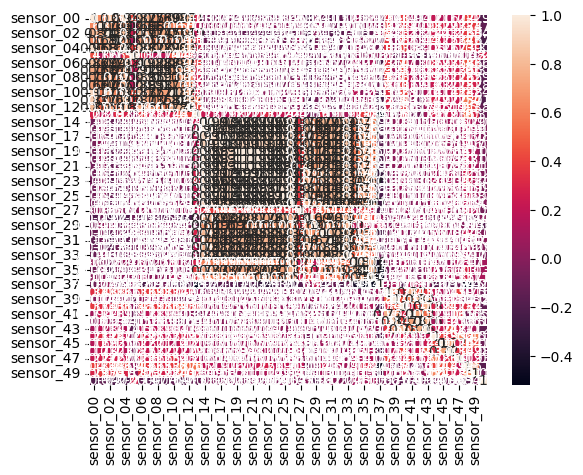

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize']=(40,40)
plt.show()

**🔎Let's zoom in on the sensors with a little correlation. By observation sensors, 14 to 26 have a high correlation. However, sensors 01 to 13 and sensor 37 to sensor 49 have very low correlation. Let's also observe sensor 37, suspected of malfunctioning over time.**


In [17]:
# try to see these sensors
X_sensorcheck=df[[  'sensor_21','sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31',
       'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36',
       'sensor_37', 'sensor_38','sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43','sensor_51']]

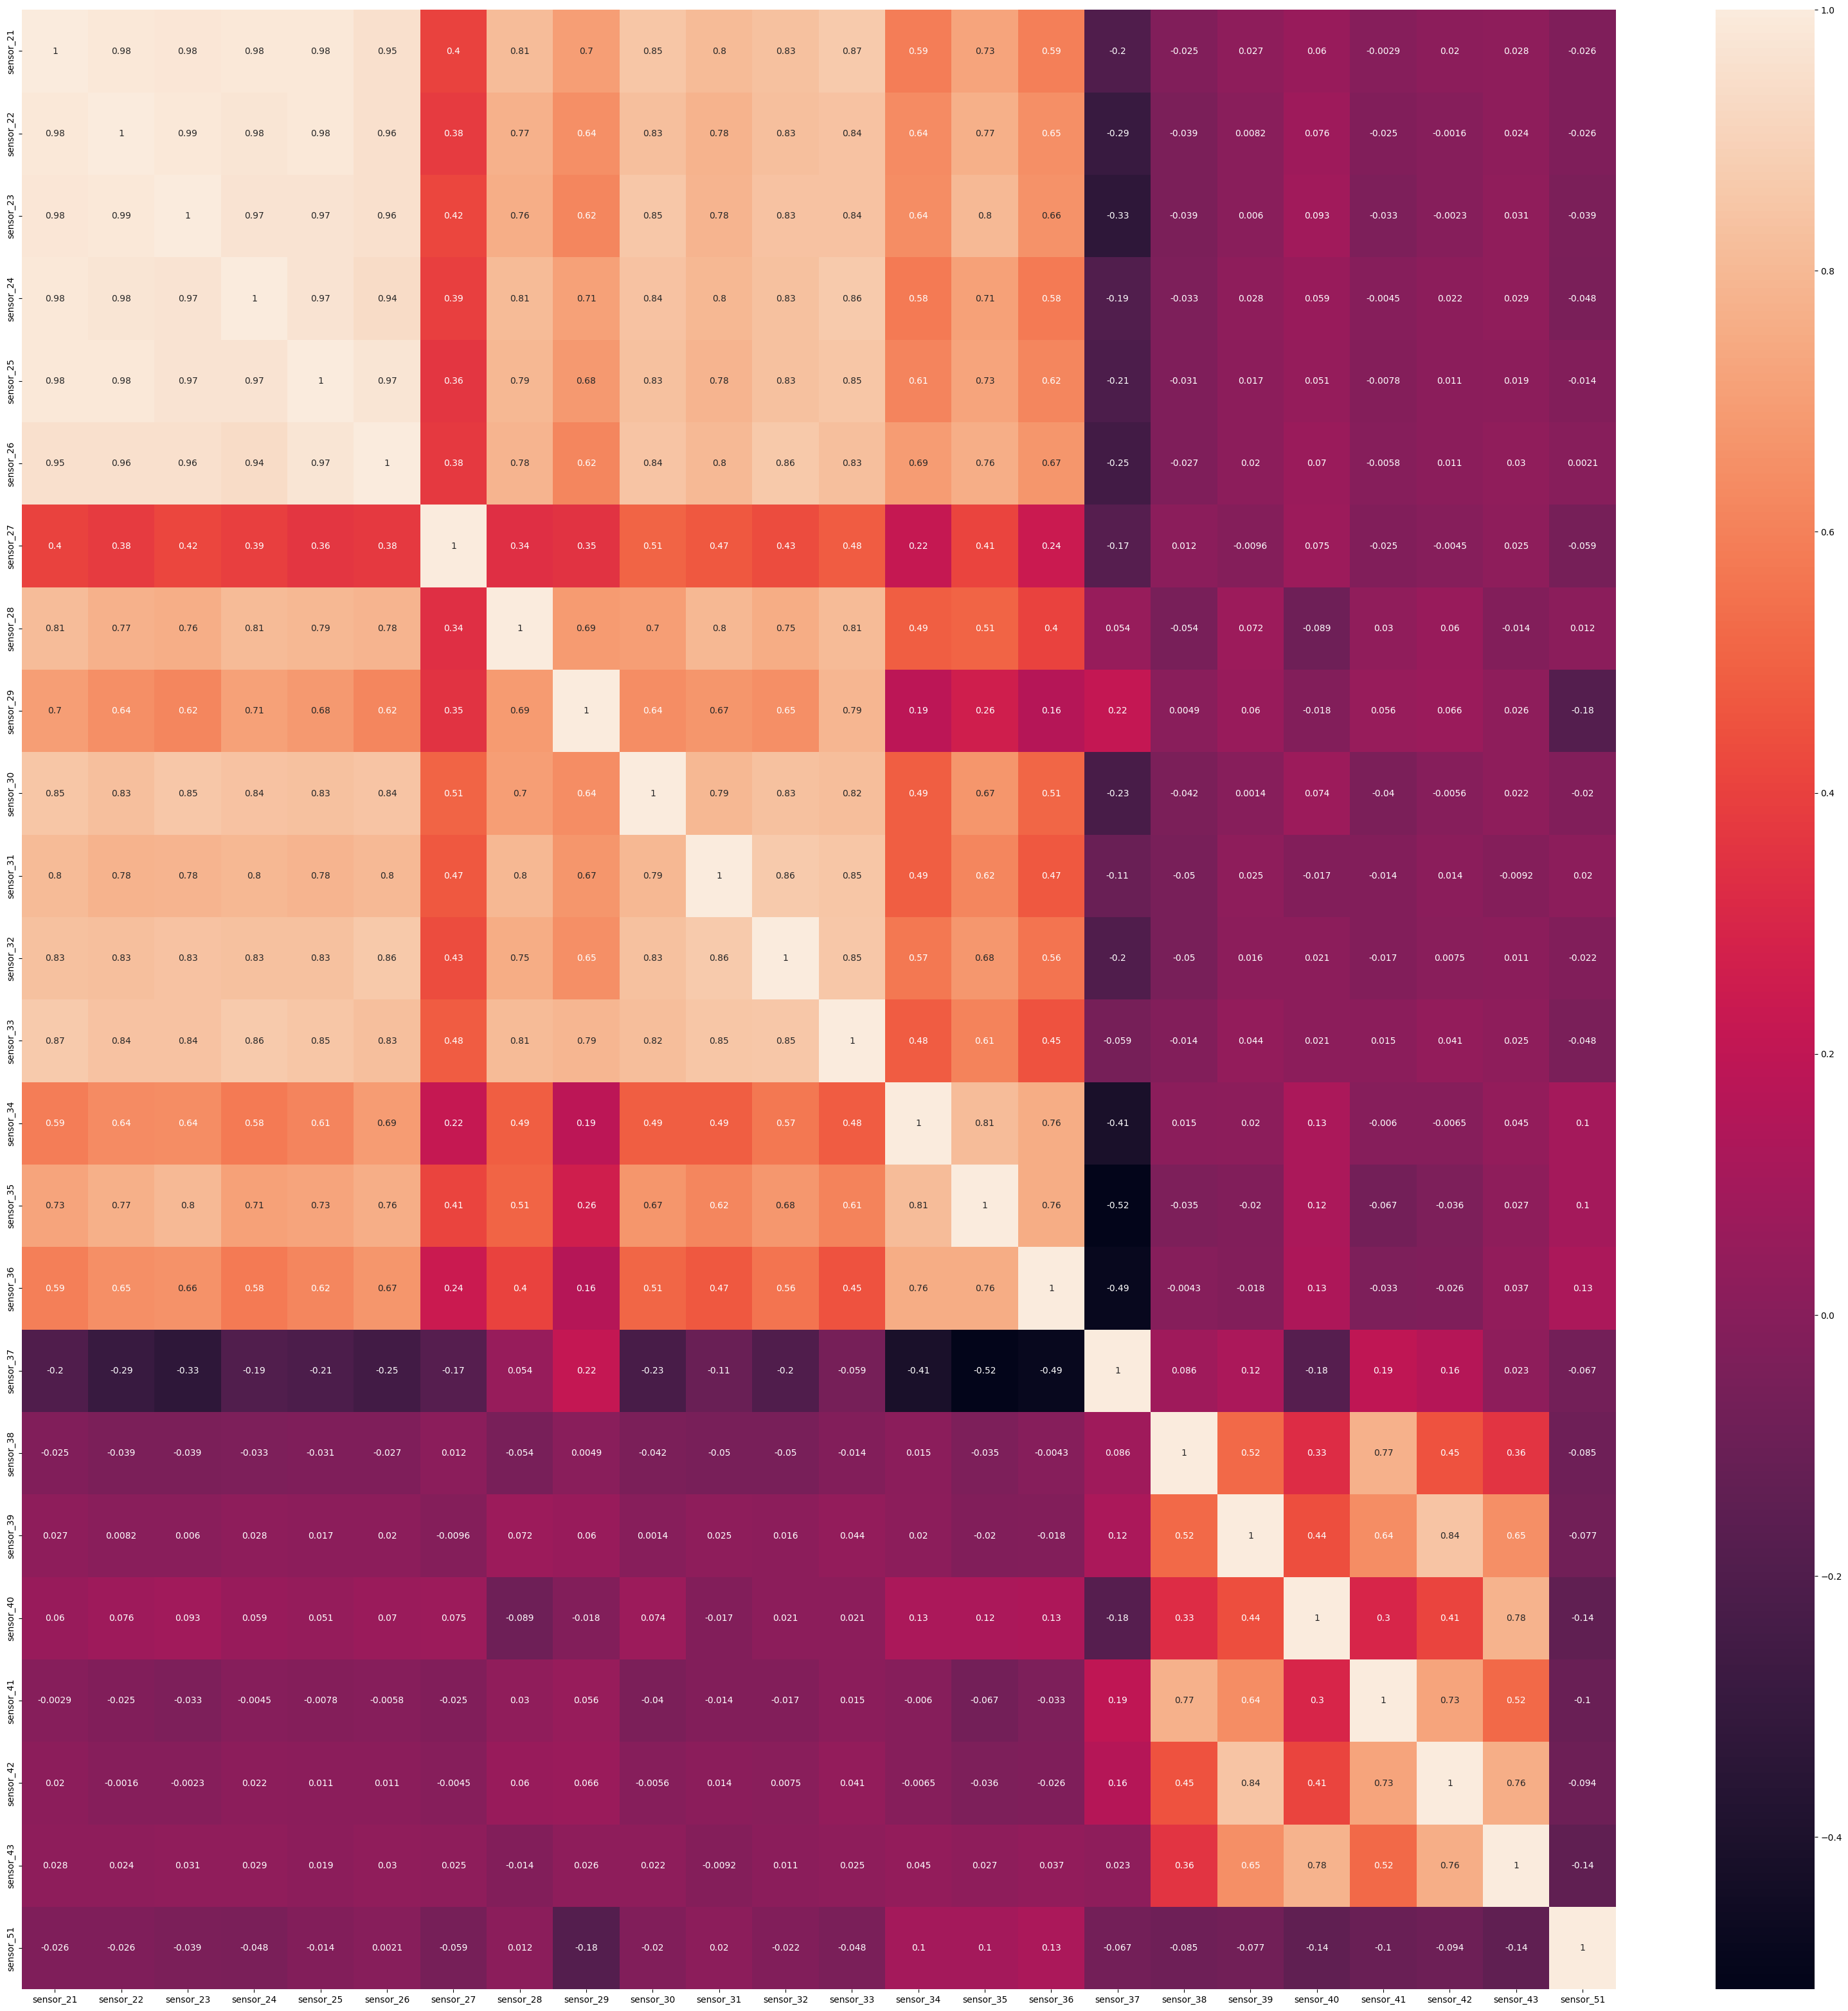

In [18]:
corr_matrix = X_sensorcheck.corr()
sns.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize']=(15,15)
plt.show()

it is clear to drop sensor 37 the least correlation with the other sensors in this group.Let's try another group with sensor_37 added in the group. This re-affirms the observation of the deteriorating sensor.

In [19]:
X_sensorcheck_2=  df[['sensor_00','sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14','sensor_37','sensor_51' ]]

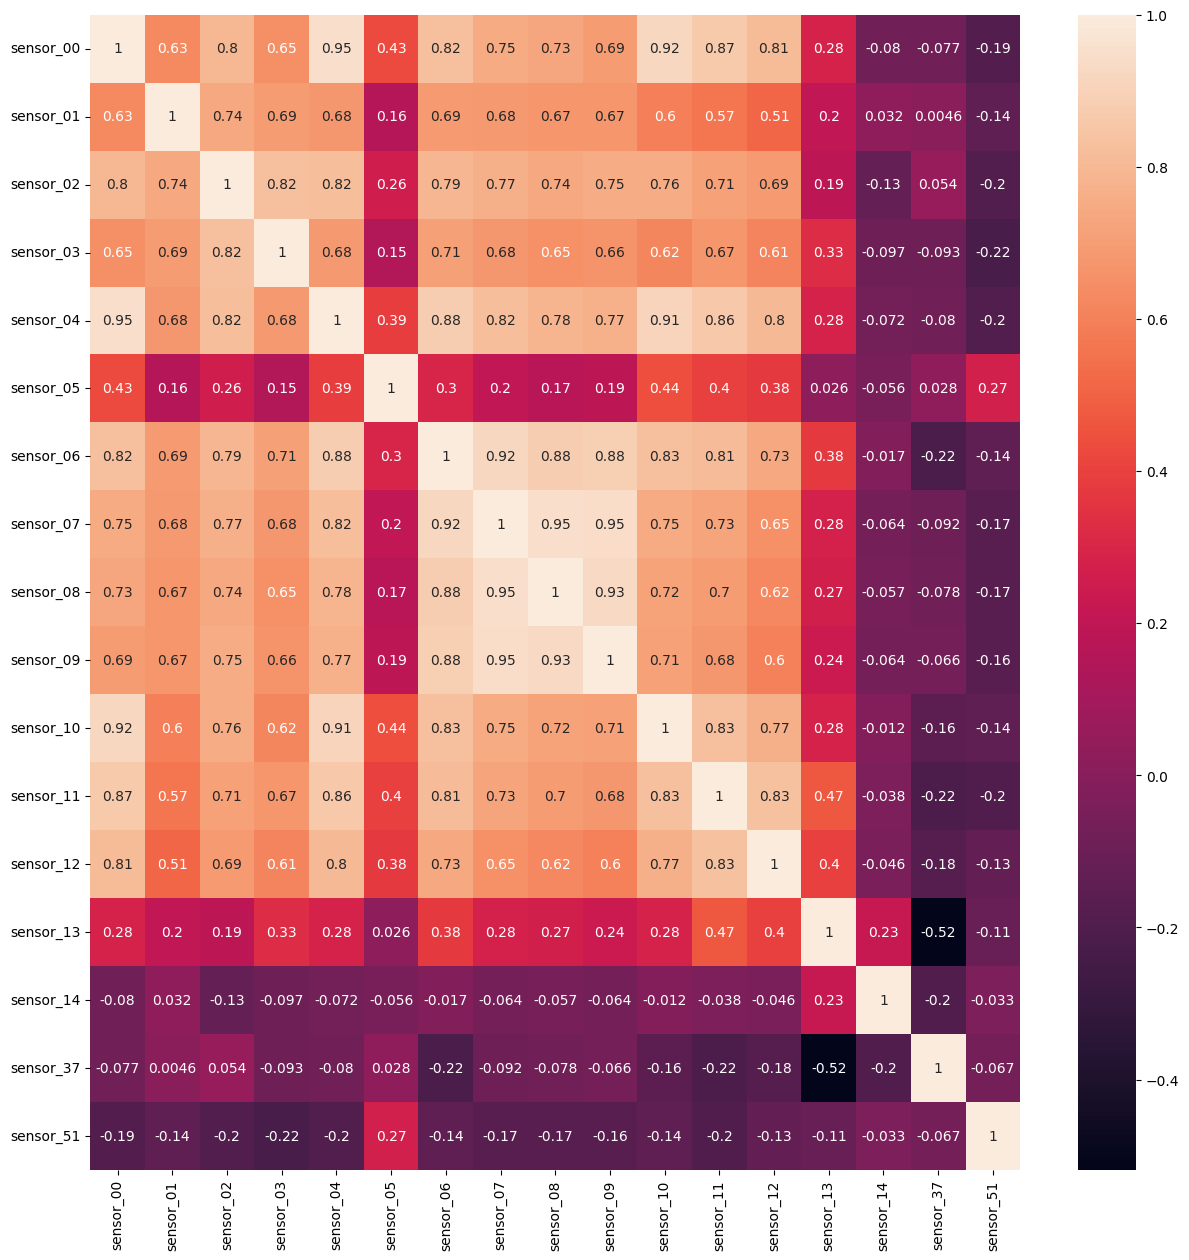

In [20]:
corr_matrix = X_sensorcheck_2.corr()
sns.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

Let's check sensore 5, sensor 14 on the next group

In [21]:
X_sensorcheck_3=  df[['sensor_34', 'sensor_35', 'sensor_36','sensor_37', 'sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46','sensor_05','sensor_14',
       'sensor_47', 'sensor_48', 'sensor_49','sensor_51' ]]

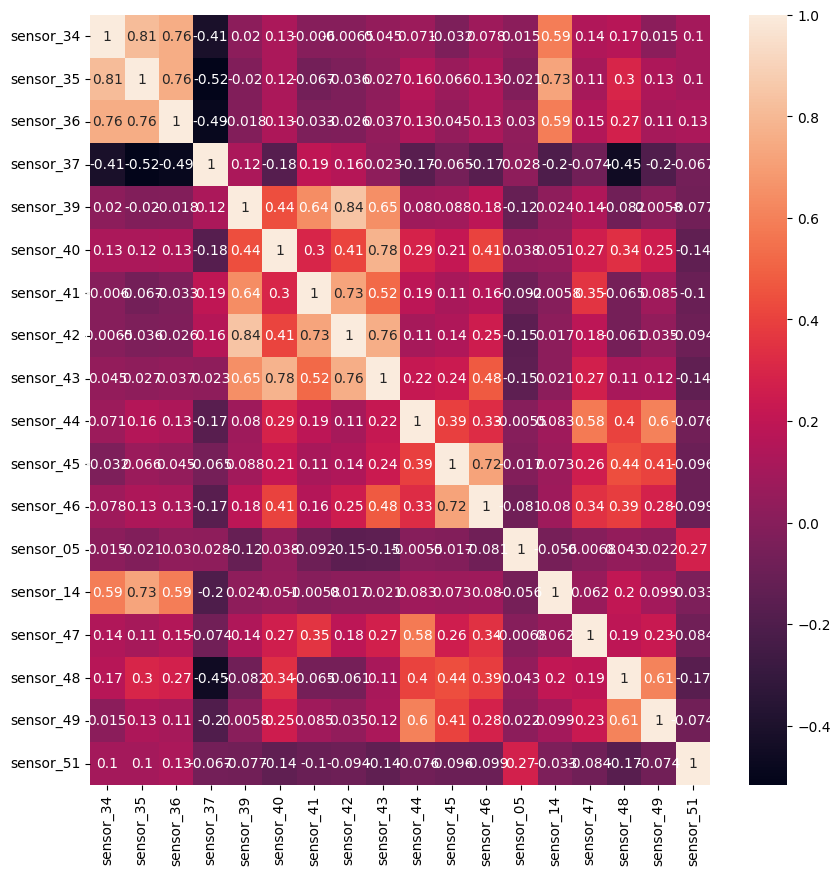

In [22]:
corr_matrix = X_sensorcheck_3.corr()
sns.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize']=(25,25)
plt.show()

In this last group sensor_37 correlates the least with other variables ( less than 30%).Thus, Sensor 37 will not be included in the final analysis.

# ⏱️**Timestamps as features**

We will now resample the timstamp and create it as a feature for the Anomaly input


In [23]:
# set timestamp to index
df.set_index('timestamp', drop=True, inplace=True)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00+00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00+00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00+00:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00+00:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00+00:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


🚨 Timeseries sampling works when encoding the 'machine_status' into number = Operation status as: anomaly=1  and Normal & Recovering=0 
* Label 0=Normal and Recovering
* Label 1=Broken

In [24]:
#Label the encoding

status = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [0, 1, 0]

choices= [0,1,0]
df['Operation'] = np.select(status, choices, default=0)


In [25]:
# resample timeseries to hourly 
data = df.resample('H').sum()
data.tail()

C:\Users\Minh Chau\AppData\Local\Temp\ipykernel_2972\984709450.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.resample('H').sum()


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,Operation
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-08-31 19:00:00+00:00,144.168464,2960.329747,3059.548465,2606.076268,37942.823178,4758.57540,907.62436,1000.42690,939.75695,905.85217,...,1830.729106,2470.31230,4859.66447,3127.02544,2901.62033,2488.136550,12324.6529,5211.51618,11815.3938,0
2018-08-31 20:00:00+00:00,144.160594,2926.388752,3048.871436,2613.020685,37934.258995,3869.07452,906.19210,999.89886,940.71908,904.88286,...,1815.364555,2542.70814,3083.33332,3417.82408,3864.29401,2353.009224,17492.1876,7658.56437,14592.8819,0
2018-08-31 21:00:00+00:00,144.158628,2900.216968,3038.194470,2597.482558,37904.907204,4151.58935,906.59724,999.80480,940.45139,905.85939,...,1845.572857,2385.15604,4120.94904,4951.96755,4256.36563,3386.863210,21911.4581,6587.67377,13746.8169,0
2018-08-31 22:00:00+00:00,144.175353,2862.586709,3035.937502,2580.815889,37930.786454,4406.47825,906.18490,999.63116,940.03906,905.37475,...,1791.145816,2559.11437,3541.37726,2702.54625,2741.89819,2271.122620,13465.2778,6186.34260,12209.7804,0
2018-08-31 23:00:00+00:00,144.142889,2865.234284,3031.770780,2584.895759,37914.207093,4092.69961,907.11800,999.15375,940.97226,905.66408,...,1774.999999,2596.87481,3609.08566,2522.85876,2926.21528,2356.192093,16418.9815,8093.17170,13631.9441,0


In [26]:
# create features from date
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_48,sensor_49,sensor_51,Operation,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00+00:00,147.270375,2913.36793,3188.541524,2773.524220,38047.2245,4544.18636,801.83005,969.72643,942.15136,905.19392,...,11847.5114,4690.10433,12601.8518,0,1,Sunday,91,13,0,7
2018-04-01 01:00:00+00:00,147.254637,2880.94611,3186.414793,2756.119694,38054.1663,4473.95323,815.58151,969.40087,942.76623,905.54113,...,10841.1461,4403.06712,12224.2472,0,1,Sunday,91,13,1,7
2018-04-01 02:00:00+00:00,147.217251,2939.58319,3180.642243,2735.590144,38065.6243,4501.01258,815.79850,969.64682,940.06800,905.53390,...,10416.9562,4550.92593,12599.8262,0,1,Sunday,91,13,2,7
2018-04-01 03:00:00+00:00,147.274309,2919.27078,3178.559090,2713.107514,38005.0193,4395.38262,816.26149,969.56000,941.31948,905.49048,...,12263.3102,6278.35645,13360.8215,0,1,Sunday,91,13,3,7
2018-04-01 04:00:00+00:00,147.227091,2899.60931,3172.091999,2707.855830,38099.1892,4208.99011,815.11132,969.08983,942.12968,905.72194,...,12785.0114,6850.69434,12698.4953,0,1,Sunday,91,13,4,7


In [27]:
#Re-checking the Anomalies in every hour
from datetime import timedelta
#locate indices of failure events and recovering and normal state
normal_idx = data.loc[data['Operation'] == 0].index
failure_idx = data.loc[data['Operation'] == 1].index
recovering_idx = data.loc[data['Operation'] == 0].index


#locate timestamps of failures:
failure_idx

DatetimeIndex(['2018-04-12 21:00:00+00:00', '2018-04-18 00:00:00+00:00',
               '2018-05-19 03:00:00+00:00', '2018-05-25 00:00:00+00:00',
               '2018-06-28 22:00:00+00:00', '2018-07-08 00:00:00+00:00',
               '2018-07-25 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', freq=None)

# 🛠 **Pycaret Anomaly detection setup**

* Pycaret Anomaly detection is a very powerful unsupervised tool to detect anomalies. Although it does not have the same options as the Pycaret classification tool, it provides models which could be applied to the dataset.

* This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function. It takes one mandatory parameter: data. All the other parameters are optional. Refer to: https://pycaret.readthedocs.io/en/stable/api/anomaly.html for more information

In [28]:
from pycaret.anomaly import *
print("Pycaret Anomaly setup Complete")

Pycaret Anomaly setup Complete


In [29]:

# data_sample = data.drop(columns=['Operation'], inplace=True)
s = setup(data, session_id = 42,
          ordinal_features = {'day_name' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday','Saturday','Sunday']},
          numeric_features=['is_weekday'],
         normalize=True,
         normalize_method='minmax')

In [30]:
get_config('X')

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_48,sensor_49,sensor_51,Operation,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00+00:00,147.270370,2913.367920,3188.541504,2773.524170,38047.222656,4544.186523,801.830078,969.726440,942.151367,905.193909,...,11847.511719,4690.104492,12601.851562,0,1,Sunday,91,13,0,7
2018-04-01 01:00:00+00:00,147.254639,2880.946045,3186.414795,2756.119629,38054.167969,4473.953125,815.581482,969.400879,942.766235,905.541138,...,10841.146484,4403.066895,12224.247070,0,1,Sunday,91,13,1,7
2018-04-01 02:00:00+00:00,147.217255,2939.583252,3180.642334,2735.590088,38065.625000,4501.012695,815.798523,969.646790,940.067993,905.533875,...,10416.956055,4550.925781,12599.826172,0,1,Sunday,91,13,2,7
2018-04-01 03:00:00+00:00,147.274307,2919.270752,3178.559082,2713.107422,38005.019531,4395.382812,816.261475,969.559998,941.319458,905.490479,...,12263.310547,6278.356445,13360.821289,0,1,Sunday,91,13,3,7
2018-04-01 04:00:00+00:00,147.227097,2899.609375,3172.092041,2707.855713,38099.187500,4208.990234,815.111328,969.089844,942.129700,905.721924,...,12785.011719,6850.694336,12698.495117,0,1,Sunday,91,13,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00+00:00,144.168457,2960.329834,3059.548584,2606.076172,37942.824219,4758.575195,907.624390,1000.426880,939.756958,905.852173,...,12324.653320,5211.516113,11815.393555,0,31,Friday,243,35,19,5
2018-08-31 20:00:00+00:00,144.160599,2926.388672,3048.871338,2613.020752,37934.257812,3869.074463,906.192078,999.898865,940.719055,904.882874,...,17492.187500,7658.564453,14592.881836,0,31,Friday,243,35,20,5
2018-08-31 21:00:00+00:00,144.158630,2900.217041,3038.194580,2597.482666,37904.906250,4151.589355,906.597229,999.804810,940.451416,905.859375,...,21911.458984,6587.673828,13746.817383,0,31,Friday,243,35,21,5


In [31]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


🖋️ Here are several anomaly outlier detection models. We can try iforest,knn, lof and sos and compare Precision, Recall, and F1( for class 1 classification) as the whole objective is to detect the anomalies; the overall accuracy is also added for reference purposes and overall classification accuracy of the selected model.

# **Analysis of models**

In [32]:
#Original data label
label=data.iloc[:,-7]
label

timestamp
2018-04-01 00:00:00+00:00    0
2018-04-01 01:00:00+00:00    0
2018-04-01 02:00:00+00:00    0
2018-04-01 03:00:00+00:00    0
2018-04-01 04:00:00+00:00    0
                            ..
2018-08-31 19:00:00+00:00    0
2018-08-31 20:00:00+00:00    0
2018-08-31 21:00:00+00:00    0
2018-08-31 22:00:00+00:00    0
2018-08-31 23:00:00+00:00    0
Freq: H, Name: Operation, Length: 3672, dtype: int32

***📌KNN***

In [33]:
## creating a model
knn=create_model('knn')
## plotting a model
plot_model(knn)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:38:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
# data.to_csv('test.csv')
knn_predictions=predict_model(knn,data=data)
knn_predictions

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,day_name_4.0,day_name_4.0,day_name_5.0,day_name_5.0,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00+00:00,0.966529,0.697310,0.877411,0.884136,0.965927,0.757365,0.830582,0.692434,0.649398,0.603536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0,0.335734
2018-04-01 01:00:00+00:00,0.966426,0.674266,0.875854,0.866232,0.966105,0.745660,0.844851,0.692201,0.649823,0.603768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,1.000000,0,0.286994
2018-04-01 02:00:00+00:00,0.966180,0.715943,0.871628,0.845113,0.966397,0.750170,0.845076,0.692377,0.647959,0.603763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,1.000000,0,0.256923
2018-04-01 03:00:00+00:00,0.966555,0.701505,0.870103,0.821985,0.964851,0.732565,0.845556,0.692315,0.648824,0.603734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,1.000000,0,0.221802
2018-04-01 04:00:00+00:00,0.966245,0.687531,0.865368,0.816582,0.967253,0.701499,0.844363,0.691978,0.649383,0.603888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.173913,1.000000,0,0.264256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00+00:00,0.946171,0.730688,0.782975,0.711881,0.963264,0.793097,0.940353,0.714402,0.647745,0.603975,...,1.0,1.0,0.0,0.0,1.0,1.0,0.826087,0.666667,0,0.386325
2018-08-31 20:00:00+00:00,0.946120,0.706565,0.775158,0.719025,0.963046,0.644847,0.938867,0.714024,0.648409,0.603329,...,1.0,1.0,0.0,0.0,1.0,1.0,0.869565,0.666667,0,0.417890
2018-08-31 21:00:00+00:00,0.946107,0.687963,0.767341,0.703040,0.962297,0.691932,0.939287,0.713957,0.648224,0.603980,...,1.0,1.0,0.0,0.0,1.0,1.0,0.913043,0.666667,0,0.461456


In [35]:
y_data_knn=knn_predictions.iloc[:,-9]
# y_data_knn=data.iloc[:,-7]
y_data_knn

timestamp
2018-04-01 00:00:00+00:00    0.0
2018-04-01 01:00:00+00:00    0.0
2018-04-01 02:00:00+00:00    0.0
2018-04-01 03:00:00+00:00    0.0
2018-04-01 04:00:00+00:00    0.0
                            ... 
2018-08-31 19:00:00+00:00    1.0
2018-08-31 20:00:00+00:00    1.0
2018-08-31 21:00:00+00:00    1.0
2018-08-31 22:00:00+00:00    1.0
2018-08-31 23:00:00+00:00    1.0
Freq: H, Name: day_name_4.0, Length: 3672, dtype: float64

In [36]:
y_hat_knn=knn_predictions.iloc[:,-2]
y_hat_knn

timestamp
2018-04-01 00:00:00+00:00    0
2018-04-01 01:00:00+00:00    0
2018-04-01 02:00:00+00:00    0
2018-04-01 03:00:00+00:00    0
2018-04-01 04:00:00+00:00    0
                            ..
2018-08-31 19:00:00+00:00    0
2018-08-31 20:00:00+00:00    0
2018-08-31 21:00:00+00:00    0
2018-08-31 22:00:00+00:00    0
2018-08-31 23:00:00+00:00    0
Freq: H, Name: Anomaly, Length: 3672, dtype: int32

In [37]:
print(classification_report(y_data_knn,y_hat_knn))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      3144
         1.0       0.18      0.05      0.07       528

    accuracy                           0.83      3672
   macro avg       0.52      0.50      0.49      3672
weighted avg       0.76      0.83      0.79      3672



In [38]:
# print(confusion_matrix(y_data_knn,y_hat_knn))

Observation:
🚩 All 7 failures were correctly predicted by the model. The Accuracy of Normal /recovery behavior improved also from Iforest results.


# 📌Save Models
* To save model, used save_model function and pass in the model’s name.

In [39]:
save_model(knn, 'knn_3.8')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\MINHCH~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['is_weekday'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['day_name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['day...
                  TransformerWrapper(include=['day_name'],
                                     transformer=OneHotEncoder(cols=['day_name'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model',
                  KNN(algorithm

In [40]:
loaded_model=load_model('knn_3.8')

Transformation Pipeline and Model Successfully Loaded


# 📌 Recommendation & Results

*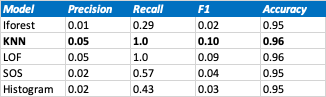

> * In summary:

* 🏴󠁧󠁢󠁥KNN produced the highest score on the anomaly detection as compared to the other models( all the broken labels were detected)
* 🏴󠁧󠁢󠁥We require more data and information regarding the sensors in order to verify the on unseen whether the model will produce the same   results. 


# **📌 Additional Reference:**
1. Markus Goldstein and Andreas Dengel. Histogram-based outlier score (hbos): a fast unsupervised anomaly detection algorithm. KI-2012: Poster and Demo Track, pages 59–63, 2012.
